# Evaluating Gene Correlations - Primitive erythroid cells

In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt


from moscot.problems.time._lineage import TemporalProblem

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [229]:
ct='E7:Hematoendothelial progenitors'
i=6

ts0=ts[i]
ts1=ts[i+1]

In [263]:
ct='E8.25:Spinal cord'
i=11

ts0=ts[i]
ts1=ts[i+1]

In [242]:
ct='E7.5:Rostral neuroectoderm'
i=8

ts0=ts[i]
ts1=ts[i+1]

In [4]:
ct='E8.5a:Allantois'
i=12

ts0=ts[i]
ts1=ts[i+1]

In [138]:
ct='E7.75:Allantois'
i=9

ts0=ts[i]
ts1=ts[i+1]

In [152]:
ct='E8:Allantois'
i=10

ts0=ts[i]
ts1=ts[i+1]

In [153]:
gT=np.load(f"{Path}/TOME_transport_maps/{ts0}_{ct}_pull2.npy", allow_pickle=True)
gM=np.load(f"{Path}/moscot_maps/{ts0}_{ct}_pull2.npy", allow_pickle=True)

# Correlation for curated genes

The following list of genes was obtained by litarture seach when looking for genes that predict deveopment into first heart field cells. The key in the dictionary corresponds to the citation (Pubmed ID), and the values correspond to the genes the publication lists.

TOME used the following genes to identify the first heart field cluster: Tbx5, Hcn4, Gata4.

In [253]:
genes=['Hesx1', 'Tcf3', 'Wnt8', 'Hesx1', 'Six3' 'Rax', 'Cwnt8c', 'Dkk1', 'Icat', 'Wnt3a', 'Nog']

In [219]:
D={}
D['https://www.rndsystems.com/research-area/early-ectodermal-lineage-markers']=['Bmp4']
D['PMID: 18480279']=['Foxg1']
D['PMID: 27550649']=['Foxg1', 'Krt18', 'Krt8', 'P63', 'Bmp4', 'Mir450b', 'Smad1', 'Smad5', 
                     'Smad9', 'Dlx5', 'Gata2', 'Msx1', 'Tbx3', 'Msx2', 'Krt14', 'Tfap2c', 'Perp', 
                     'Tfap2a', 'Tfap2c', 'Aldh1a3', 'Dlx5', 'Lef1', 'Krt19', 'Tfap2a', 'Bmpr2'
                    'Id1', 'Id2', 'Tbx3', 'Trp63']
D['PMID: 18619436']=['Grhl1', 'Grhl2', 'Grhl3', 'Lmo4']

genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [410]:
D={}
D['a']=['Foxb1', 'Pax6', 'Crabp2']

# Careful with Bmp4, Bmp6, Bmp7, Gdf7, Shh. Not sure how much of them is expressed vs. how muhc just diffuses in from roof/floor plate

D['PMID: 26136656']=['Pax6', 'Irx3', 'Lmx1a', 'Olig2', 'Nkx2-2', 'Ngn3', 'Nkx2-9', 'Nkx6-1', 'Dbx2', 'Ptf1a', 'Bmp4', 'Bmp6', 'Bmp7', 'Gdf7', 'Wnt', 'Shh','Nkx6-2', 'Dbx1', 'Ngn2', 'Gdf7', 'Pax7', 'Lhx3', 'Pax3', 'Msx1', 'Ngn1',
    'Olig3', 'Gsh1', 'Ngn2', 'Gata2', 'Foxn4', 'Ascl1', 'Math1', 'Bmpr1a', 'Bmpr1b', 'Gsh2', 'Hb9', 'Isl1', 'Isl2', 'Hnf6', 'Etv1', 'Etv4']

D['PMID: 34351410']=['Sox2', 'Lmx1a', 'Wnt1', 'Irx3', 'Irx5', 'Ascl1', 'Gbx2', 'Dbx1', 'Dbx1', 'Sp8', 'Arx',
                   'Ferd3l', 'Foxa2', 'Lmx1b', 'Otp', 'Lhx2', 'Lhx5', 'Isl1', 'Tlx3', 'Sim1']

genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [170]:
D={}
D['PMID: 21932311']=['Tbx4']
D['PMID: 28057264']=['Tbx5']
D['PMID: 22219351']=['Hoxa10', 'Hoxa11', 'Hoxa13']
D['PMID: 16396910']=['Cdx4', 'Cdx1', 'Cdx2']
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

# These genes are associated with absent allanotis phenotype. Probably not too accurate
D['https://maayanlab.cloud/Harmonizome/gene_set/absent+allantois/MPO+Gene-Phenotype+Associations']=['Ctdnep1', 'Ctnnb1', 'Cubn', 'Dab2', 'Gnpnat1', 'Hnf4a', 'Ldb1', 'Lin9', 'Mllt4', 'Nodal',
                   'Prkci', 'Slc31a1', 'Smad2', 'T', 'Tfap2c', 'Wnt3']

In [171]:
genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [160]:
adata=sc.read(f"{Path}/anndatas/scVI_anndatas/scvi_adata_{ts0}.h5ad")
adata.var.index=list(adata.var['gene_names'])

In [161]:
ExE_cell_types=['Embryonic visceral endoderm', 'Extraembryonic visceral endoderm', 'Parietal endoderm', 'Extraembryonic ectoderm', 'Primitive erythroid cells', 'Blood progenitors']
adata=adata[~adata.obs['cell_type'].isin(ExE_cell_types)].copy()

In [144]:
genes=list(adata.var['gene_names'])

In [172]:
hvgs=list(adata.var[adata.var['highly_variable']]['gene_names'])
genes_selected=[]
for gene in genes:
    if gene in hvgs:
        genes_selected.append(gene)
len(genes_selected)

20

In [173]:
subset=True

DF=pd.DataFrame({})

for gene in genes_selected:
    loc=adata.var.index.get_loc(gene)
    exp=adata.layers['scvi_normalized'][:,loc]
    #exp=adataS.X[:,loc]
    #exp=np.array(exp.todense()).T[0]

    if subset==True:
        #wh=np.where(adata.obs['cell_state'].isin(['E7.5:Primitive streak and adjacent ectoderm', 'E7.5:Surface ectoderm']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E8.25:Surface ectoderm']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E6.75:Nascent mesoderm']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E7.25:Epiblast']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E8:Caudal neuroectoderm', 'E8:Spinal cord']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E8.25:Allantois', 'E8.25:Extraembryonic mesoderm']))[0]
        #wh=np.where(adata.obs['cell_state'].isin(['E7.5:Extraembryonic mesoderm']))[0]
        wh=np.where(adata.obs['cell_state'].isin(['E7.75:Extraembryonic mesoderm']))[0]

        
        exp=exp[wh]
        gT2=gT[wh]
        gM2=gM[wh]
    else:
        gT2=gT.copy()
        gM2=gM.copy()


    (cor, p)=scipy.stats.spearmanr(exp, gT2)
    dfT=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'TOME', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    (cor, p)=scipy.stats.spearmanr(exp, gM2)
    dfM=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'moscot', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    DF=pd.concat([DF, dfM,dfT])
DF['Abs. Correlation']=abs(DF['Correlation'])
DF.index=np.arange(len(DF))

In [ ]:
gT2

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

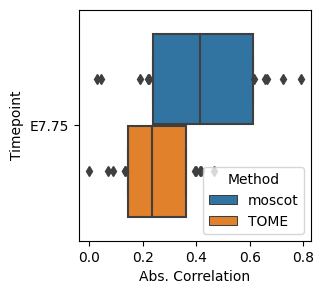

In [174]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

In [48]:
D={}

In [49]:
D['PMID: 21932311']=['Tbx4']
D['PMID: 28057264']=['Tbx5']
D['PMID: 22219351']=['Hoxa10', 'Hoxa11', 'Hoxa13']
D['PMID: 16396910']=['Cdx4', 'Cdx1', 'Cdx2']
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [50]:
D['PMID: 28057264']=['Tbx5']
D['PMID: 22219351']=['Hoxa10', 'Hoxa11', 'Hoxa13']
D['PMID: 16396910']=['Cdx4', 'Cdx1', 'Cdx2']
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [51]:
D['PMID: 22219351']=['Hoxa10', 'Hoxa11', 'Hoxa13']
D['PMID: 16396910']=['Cdx4', 'Cdx1', 'Cdx2']
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [52]:
D['PMID: 16396910']=['Cdx4', 'Cdx1', 'Cdx2']
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [53]:
D['PMID: 22960234']=['Cdx2']
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [ ]:
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [ ]:
# Dkk1 blocks Rspo3, hence likely/potentially downregulated
D['PMID: 18842812']=['Rspo1', 'Rspo2', 'Rspo3', 'Dkk1']

In [ ]:
Wnt/β-catenin signaling

In [98]:
DF[DF['Gene'].isin(['Bmp4'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
3680,E8.25,Bmp4,moscot,0.530662,1.745177e-116,Spearman,0.530662
3681,E8.25,Bmp4,TOME,0.283174,8.919733e-31,Spearman,0.283174


In [99]:
DF[DF['Gene'].isin(['Bmp8b'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
1638,E8.25,Bmp8b,moscot,0.642188,4.772409e-186,Spearman,0.642188
1639,E8.25,Bmp8b,TOME,0.703675,1.461821e-238,Spearman,0.703675


In [115]:
DF[DF['Gene'].isin(['Ctdnep1', 'Ctnnb1', 'Cubn', 'Dab2', 'Gnpnat1', 'Hnf4a', 'Ldb1', 'Lin9', 'Mllt4', 'Nodal',
                   'Prkci', 'Slc31a1', 'Smad2', 'T', 'Tfap2c', 'Wnt3'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
374,E8.25,Cubn,moscot,0.030615,2.218474e-01,Spearman,0.030615
375,E8.25,Cubn,TOME,0.064477,1.002641e-02,Spearman,0.064477
726,E8.25,Hnf4a,moscot,-0.622458,1.172529e-171,Spearman,0.622458
727,E8.25,Hnf4a,TOME,-0.587858,9.004379e-149,Spearman,0.587858
776,E8.25,Tfap2c,moscot,0.196878,2.157665e-15,Spearman,0.196878
777,E8.25,Tfap2c,TOME,0.330856,5.022440e-42,Spearman,0.330856
3078,E8.25,Nodal,moscot,-0.760721,3.957107e-301,Spearman,0.760721
3079,E8.25,Nodal,TOME,-0.805545,0.000000e+00,Spearman,0.805545
4548,E8.25,Wnt3,moscot,0.501118,4.291430e-102,Spearman,0.501118
4549,E8.25,Wnt3,TOME,0.599378,4.409867e-156,Spearman,0.599378


In [116]:
# These genes are associated with absent allanotis phenotype. Probably not too accurate
D['https://maayanlab.cloud/Harmonizome/gene_set/absent+allantois/MPO+Gene-Phenotype+Associations']=['Ctdnep1', 'Ctnnb1', 'Cubn', 'Dab2', 'Gnpnat1', 'Hnf4a', 'Ldb1', 'Lin9', 'Mllt4', 'Nodal',
                   'Prkci', 'Slc31a1', 'Smad2', 'T', 'Tfap2c', 'Wnt3']

In [62]:
DF[DF['Gene'].isin(['Tie1', 'Tie2'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
1624,E8.25,Tie1,moscot,0.421036,1.657992e-69,Spearman,0.421036
1625,E8.25,Tie1,TOME,0.401904,6.204502e-63,Spearman,0.401904


In [66]:
DF[DF['Gene'].isin(['Tgfbr1', 'Tgfb1'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
2574,E8.25,Tgfb1,moscot,0.733797,1.404884e-269,Spearman,0.733797
2575,E8.25,Tgfb1,TOME,0.735453,2.086154e-271,Spearman,0.735453


In [67]:
DF[DF['Gene'].isin(['Dll4'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
604,E8.25,Dll4,moscot,0.556234,3.811815e-130,Spearman,0.556234
605,E8.25,Dll4,TOME,0.386614,5.557671e-58,Spearman,0.386614


In [73]:
DF[DF['Gene'].isin(['Notch1', 'Notch3', 'Notch4', 'Dll4'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
418,E8.25,Notch1,moscot,-0.271344,2.662942e-28,Spearman,0.271344
419,E8.25,Notch1,TOME,-0.021496,3.910911e-01,Spearman,0.021496
604,E8.25,Dll4,moscot,0.556234,3.811815e-130,Spearman,0.556234
605,E8.25,Dll4,TOME,0.386614,5.557671e-58,Spearman,0.386614


In [76]:
DF[DF['Gene'].isin(['Hey1', 'Hey2', 'Efnb2'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
1122,E8.25,Hey1,moscot,0.115127,4.062677e-06,Spearman,0.115127
1123,E8.25,Hey1,TOME,0.188890,2.869673e-14,Spearman,0.188890


In [79]:
DF[DF['Gene'].isin(['Rspo3'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
3022,E8.25,Rspo3,moscot,-0.230687,1.068472e-20,Spearman,0.230687
3023,E8.25,Rspo3,TOME,0.079087,1.577585e-03,Spearman,0.079087


In [40]:
DF[DF['Gene'].isin(['Snai1'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
756,E8.25,Snai1,moscot,0.565771,1.497997e-135,Spearman,0.565771
757,E8.25,Snai1,TOME,0.731636,3.250730e-267,Spearman,0.731636


In [ ]:
D['PMID: 22855605']=['Kdr', 'Pecam1', 'Cdh5']
# SIgnaling molecules
D['PMID: 22855605']=['Wnt2', 'Wnt5a', 'Wnt11', 'Rspo3', 'Bmp4', 'Smad1']

In [ ]:
# Transcription factors
D['PMID: 22855605']=['Etv2', 'Foxf1', 'Cdh5', 'Wnt2', 'Wnt5a', 'Wnt11', 'Rspo3', 'Bmp4', 'Smad1']

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

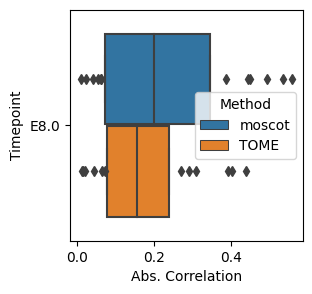

In [421]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

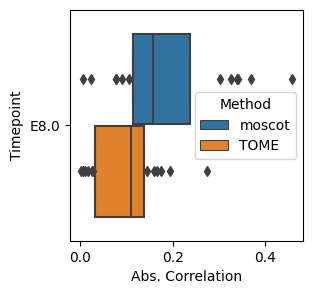

In [414]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

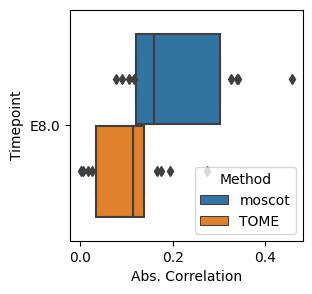

In [401]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

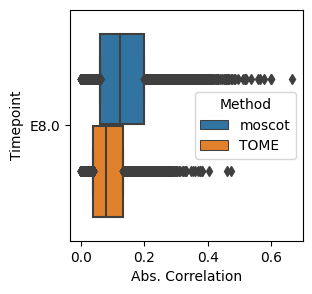

In [284]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

In [417]:
DF.sort_values('Abs. Correlation')

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
11,E8.0,Gata2,TOME,-0.000306,9.935328e-01,Spearman,0.000306
12,E8.0,Lhx5,moscot,0.004493,9.052166e-01,Spearman,0.004493
37,E8.0,Olig3,TOME,-0.005904,8.756468e-01,Spearman,0.005904
13,E8.0,Lhx5,TOME,0.008917,8.131677e-01,Spearman,0.008917
31,E8.0,Bmp7,TOME,-0.015807,6.752354e-01,Spearman,0.015807
6,E8.0,Foxa2,moscot,-0.022364,5.533005e-01,Spearman,0.022364
27,E8.0,Etv4,TOME,-0.024725,5.121922e-01,Spearman,0.024725
43,E8.0,Sox2,TOME,-0.026168,4.878732e-01,Spearman,0.026168
23,E8.0,Msx1,TOME,-0.033157,3.793760e-01,Spearman,0.033157
5,E8.0,Pax3,TOME,-0.050508,1.803892e-01,Spearman,0.050508


In [373]:
# Floor plate specific markers -'Sox10', 'Six1' are neural crest markers!!!
DF[DF['Gene'].isin(['Foxa2', 'Nkx2-2', 'Olig2', 'Pax6', 'Olig3', 'Msx1', 'Sox2', 'Elavl3'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
16,E8.0,Msx1,moscot,0.191663,2.934734e-07,Spearman,0.191663
17,E8.0,Msx1,TOME,-0.033157,3.793760e-01,Spearman,0.033157
28,E8.0,Olig3,moscot,-0.213807,9.848572e-09,Spearman,0.213807
29,E8.0,Olig3,TOME,-0.005904,8.756468e-01,Spearman,0.005904


In [ ]:
D['PMID: 34351410']=['Sox2', 'Lmx1a', 'Wnt1', 'Irx3', 'Irx5', 'Ascl1', 'Gbx2', 'Dbx1', 'Dbx1', 'Sp8', 'Arx',
                   'Ferd3l', 'Foxa2', 'Lmx1b', 'Otp', 'Lhx2', 'Lhx5', 'Isl1', 'Tlx3', 'Sim1']

In [405]:
# Floor plate specific markers -'Sox10', 'Six1' are neural crest markers!!!
DF[DF['Gene'].isin(['Sox2', 'Lmx1a', 'Wnt1', 'Irx3', 'Irx5', 'Ascl1', 'Gbx2', 'Dbx1', 'Dbx1', 'Sp8', 'Arx',
                   'Ferd3l', 'Foxa2', 'Lmx1b', 'Otp', 'Lhx2', 'Lhx5', 'Isl1', 'Tlx3', 'Sim1'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
130,E8.0,Gbx2,moscot,0.076760,4.159853e-02,Spearman,0.076760
131,E8.0,Gbx2,TOME,0.059668,1.134433e-01,Spearman,0.059668
656,E8.0,Foxa2,moscot,-0.022364,5.533005e-01,Spearman,0.022364
657,E8.0,Foxa2,TOME,0.123332,1.032867e-03,Spearman,0.123332
1128,E8.0,Sox2,moscot,-0.147160,8.788945e-05,Spearman,0.147160
1129,E8.0,Sox2,TOME,-0.026168,4.878732e-01,Spearman,0.026168
1990,E8.0,Lhx5,moscot,0.004493,9.052166e-01,Spearman,0.004493
1991,E8.0,Lhx5,TOME,0.008917,8.131677e-01,Spearman,0.008917
3042,E8.0,Sim1,moscot,0.200652,7.745743e-08,Spearman,0.200652
3043,E8.0,Sim1,TOME,0.090233,1.655256e-02,Spearman,0.090233


In [407]:
# Floor plate specific markers -'Sox10', 'Six1' are neural crest markers!!!
DF[DF['Gene'].isin(['Isl1', 'Phox2b', 'Tbx2', 'Tbx3', 'Tbx20'])]

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
1984,E8.0,Tbx3,moscot,0.022844,0.544819,Spearman,0.022844
1985,E8.0,Tbx3,TOME,-0.084955,0.024085,Spearman,0.084955
3874,E8.0,Tbx20,moscot,0.007250,0.847606,Spearman,0.007250
3875,E8.0,Tbx20,TOME,-0.068449,0.069315,Spearman,0.068449
4876,E8.0,Isl1,moscot,-0.154292,0.000039,Spearman,0.154292
4877,E8.0,Isl1,TOME,-0.136590,0.000275,Spearman,0.136590


In [ ]:
Isl1, Phox2b, Tbx2, Tbx3 and Tbx20

In [ ]:
'Pax6', 'Irx3', 'Lmx1a', 'Olig2', 'Nkx2-2', 'Ngn3', 'Nkx2-9', 'Nkx6-1',
                   'Dbx2', 'Ptf1a', 'Bmp4', 'Bmp6', 'Bmp7', 'Gdf7', 'Wnt', 'Shh','Nkx6-2', 'Dbx1', 'Ngn2', 'Gdf7', 'Pax7', 'Lhx3', 'Pax3', 'Msx1', 'Ngn1',
    'Olig3', 'Gsh1', 'Ngn2', 'Gata2', 'Foxn4', 'Ascl1', 'Math1', 'Bmpr1a', 'Bmpr1b', 'Gsh2'
    'Hb9', 'Isl1', 'Isl2', 'Hnf6', 'Etv1', 'Etv4'

In [348]:
D['PMID: 26136656']=['Pax6', 'Irx3', 'Lmx1a', 'Olig2', 'Nkx2-2', 'Ngn3', 'Nkx2-9', 'Nkx6-1', 'Dbx2', 'Ptf1a', 'Bmp4', 'Bmp6', 'Bmp7', 'Gdf7', 'Wnt', 'Shh','Nkx6-2', 'Dbx1', 'Ngn2', 'Gdf7', 'Pax7', 'Lhx3', 'Pax3', 'Msx1', 'Ngn1',
    'Olig3', 'Gsh1', 'Ngn2', 'Gata2', 'Foxn4', 'Ascl1', 'Math1', 'Bmpr1a', 'Bmpr1b', 'Gsh2', 'Hb9', 'Isl1', 'Isl2', 'Hnf6', 'Etv1', 'Etv4']

In [349]:
D

{'a': ['Hhex', 'Etv2'],
 'PMID: 26136656': ['Pax6',
  'Irx3',
  'Lmx1a',
  'Olig2',
  'Nkx2-2',
  'Ngn3',
  'Nkx2-9',
  'Nkx6-1',
  'Dbx2',
  'Ptf1a',
  'Bmp4',
  'Bmp6',
  'Bmp7',
  'Gdf7',
  'Wnt',
  'Shh',
  'Nkx6-2',
  'Dbx1',
  'Ngn2',
  'Gdf7',
  'Pax7',
  'Lhx3',
  'Pax3',
  'Msx1',
  'Ngn1',
  'Olig3',
  'Gsh1',
  'Ngn2',
  'Gata2',
  'Foxn4',
  'Ascl1',
  'Math1',
  'Bmpr1a',
  'Bmpr1b',
  'Gsh2',
  'Hb9',
  'Isl1',
  'Isl2',
  'Hnf6',
  'Etv1',
  'Etv4']}

In [347]:
'Pea3 ' in all_genes

False

In [261]:
subset=True

DF=pd.DataFrame({})

gene='Six3'
loc=adata.var.index.get_loc(gene)
exp=adata.layers['scvi_normalized'][:,loc]
#exp=adataS.X[:,loc]
#exp=np.array(exp.todense()).T[0]

if subset==True:
    #wh=np.where(adata.obs['cell_state'].isin(['E7.5:Primitive streak and adjacent ectoderm', 'E7.5:Surface ectoderm']))[0]
    #wh=np.where(adata.obs['cell_state'].isin(['E8.25:Surface ectoderm']))[0]
    #wh=np.where(adata.obs['cell_state'].isin(['E6.75:Nascent mesoderm']))[0]
    wh=np.where(adata.obs['cell_state'].isin(['E7.25:Epiblast']))[0]
    exp=exp[wh]
    gT2=gT[wh]
    gM2=gM[wh]
else:
    gT2=gT.copy()
    gM2=gM.copy()


(cor, p)=scipy.stats.spearmanr(exp, gT2)
dfT=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'TOME', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
(cor, p)=scipy.stats.spearmanr(exp, gM2)
dfM=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'moscot', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
DF=pd.concat([DF, dfM,dfT])
DF['Abs. Correlation']=abs(DF['Correlation'])
DF.index=np.arange(len(DF))

In [262]:
DF

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
0,E7.25,Six3,moscot,0.104999,3.253453e-10,Spearman,0.104999
1,E7.25,Six3,TOME,0.027813,9.674865e-02,Spearman,0.027813


In [ ]:
Six3, Hesx1

In [259]:
DF.sort_values('Correlation')

,Timepoint,Gene,Method,Correlation,P-value,type,Abs. Correlation
1,E7.25,Hesx1,TOME,-0.148236,5.613424e-19,Spearman,0.148236
3,E7.25,Hesx1,TOME,-0.148236,5.613424e-19,Spearman,0.148236
0,E7.25,Hesx1,moscot,-0.134878,5.983354e-16,Spearman,0.134878
2,E7.25,Hesx1,moscot,-0.134878,5.983354e-16,Spearman,0.134878
4,E7.25,Dkk1,moscot,-0.119375,8.510928e-13,Spearman,0.119375
9,E7.25,Nog,TOME,-0.037007,2.709228e-02,Spearman,0.037007
8,E7.25,Nog,moscot,0.015391,3.581361e-01,Spearman,0.015391
6,E7.25,Wnt3a,moscot,0.021943,1.901238e-01,Spearman,0.021943
5,E7.25,Dkk1,TOME,0.026103,1.190683e-01,Spearman,0.026103
7,E7.25,Wnt3a,TOME,0.127766,1.866549e-14,Spearman,0.127766


In [22]:
DF.to_pickle(f'{Path}/Correlations/{ts0}_PEC.npy')